In [71]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import matplotlib as mpl

import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import pandas as pd
import numpy as np
import requests as rq
from bs4 import BeautifulSoup

%matplotlib inline
from matplotlib import style
style.use('ggplot')

import os


In [19]:
#os.path.isfile('home/homerojr/Downloads/br_unidades_da_federacao/BRUFE250GC_SIR.shp')


False

In [24]:
dataIds = pd.read_csv('dataJogadores', index_col=0)
dataJogos = pd.read_csv('dataGames3.csv')



In [42]:
#dataIds
#dataIds.drop('realname', axis=1, inplace = True)
#dataIds.drop('country', axis=1, inplace = True)
#dataIds.drop('personaname', axis=1, inplace = True)
#dataIds.drop('timecreated', axis=1, inplace = True)
#idsporEstado = dataIds.groupby('state').count()
#idsporEstado
#idsporestadoList = idsporEstado.values
idsporestadoList
#dataIds
#dataJogos
#frames = [dataIds, dataJogos]
#resultado = pd.concat(frames)
#resultado
#idEstados = dataIds
#idEstados
#dataJogos
#frames = [idEstados, dataJogos]
#resultado = pd.concat(frames)
#resultado
#playtime = resultado.groupby(['id', 'state'])[['playtime_forever']].sum()
#76561197960268251
#frames2 = [idEstados, playtime]
#playtimeStates = pd.concat(frames2)
#playtimeStates
#playtimeStates.to_csv('TempoJogares')


array([[22036],
       [  543],
       [  298],
       [  131],
       [  499],
       [ 1332],
       [ 1038],
       [ 2146],
       [ 1327],
       [  648],
       [  242],
       [  754],
       [ 5955],
       [  603],
       [  455],
       [ 6013],
       [  181],
       [ 8273],
       [  541],
       [ 5117],
       [  239],
       [  105],
       [ 3588],
       [22593],
       [  242],
       [ 1481],
       [ 1298],
       [  133]])

Para realizar a análise demográfica dos jogadores, iremos agrupar os estados em quatro grupos. Os que possuiam até 500 ids, 1000 ids, 5000 ids e os estados que tinham um número de ids superior a 5000.
Nosso espaço amostral era um total de 8787810 ids de jogadores.

In [82]:
states500 = ('Amapa', 'Alagoas', 'Amazonas', 'Maranhão',  'Paraíba', 'Piauí', 'Roraima', 'Tocantins')
states1000 = ('Acre', 'Amapa', 'Alagoas', 'Amazonas', 'Mato Grosso Do Sul', 'Maranhão', 'Mato Grosso', 'Pará',  'Paraíba', 'Paraná', 'Piauí', 'Rio Grande Do Norte', 'Rondônia', 'Roraima', 'Sergipe', 'Tocantins')
states5000 = ('Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Santa Catarina', 'Goiás', 'Pernambuco')
states10000 = ('Minas Gerais', 'Rio de Janeiro')
statesmais10000 = ('São Paulo')

In [50]:
from cartopy.io import shapereader


kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

In [51]:
from __future__ import unicode_literals

states = ('Minas Gerais', 'Mato Grosso', 'Goiás',
          'Bahia', 'Rio Grande do Sul', 'São Paulo')

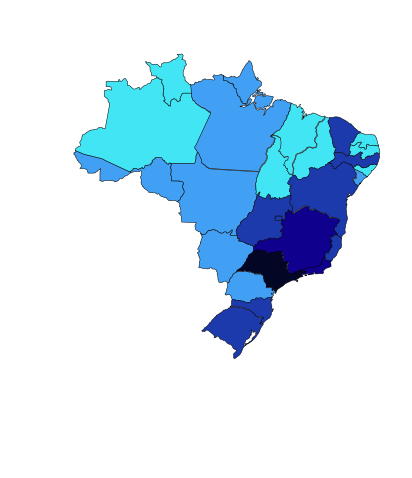

In [83]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-82, -32, -45, 10])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)



for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    if name in states500:
        facecolor = '#41e5f4'
    elif name in states1000:
        facecolor = '#41a0f4'
    elif name in states5000:
        facecolor = '#1d3aad'
    elif name in states10000:
        facecolor = '#0f018e'
    elif name in statesmais10000:
        facecolor = '#040626'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')


/home/homerojr/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


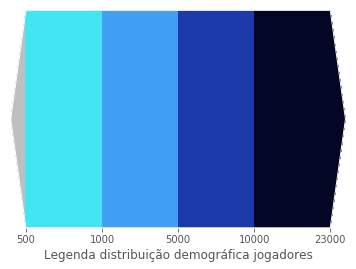

In [84]:
fig2, ax2 = plt.subplots()

cmap = mpl.colors.ListedColormap(['#41e5f4', '#41a0f4',
                                  '#1d3aad', '#0f018e', '#040626'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [500, 1000, 5000, 10000, 23000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                boundaries=[0] + bounds + [130],
                                extend='both',
                                ticks=bounds,
                                orientation='horizontal')
cb2.set_label('Legenda distribuição demográfica jogadores')
fig2.show()